---
# COM4402 INTRODUCCIÓN A LA INTELIGENCIA ARTIFICIAL - PROYECTO FINAL
---


- INTEGRANTES: KEVIN FUENTES N. Y JOSÉ SALGADO M.
- DOCENTE: HABRIEL CABAS M.
- AYUDANTE: NAIRO TORRES F.

---
## PARTE 1 - CARGA DE ARCHIVOS Y ANÁLISIS EXPLORATORIO DE DATOS
---

In [44]:
# CARGAMOS LAS LIBRERIAS NECESARIAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [45]:
# CARGAMOS EL DATAFRAME Y VISUALIZAMOS PRIMERAS FILAS
df = pd.read_csv('USA_cars_datasets.csv')
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [46]:
# OBTENER CANTIDAD DE FILAS Y DE COLUMNAS
print(f'Cantidad de filas: {df.shape[0]}')
print(f'Cantidad de columnas: {df.shape[1]}')

Cantidad de filas: 2499
Cantidad de columnas: 13


In [47]:
# OBTENER EL TIPO DE DATOS DEL DATASET
df.dtypes

Unnamed: 0        int64
price             int64
brand            object
model            object
year              int64
title_status     object
mileage         float64
color            object
vin              object
lot               int64
state            object
country          object
condition        object
dtype: object

In [48]:
# VERIFICAR EXISTENCIA DE VALORES NULOS
df.isnull().sum().any()

False

In [49]:
# OBTENER ESTADÍSTICAS BÁSICAS
df.describe()

,Unnamed: 0,price,year,mileage,lot
count,2499.000000,2499.000000,2499.000000,2.499000e+03,2.499000e+03
mean,1249.000000,18767.671469,2016.714286,5.229869e+04,1.676914e+08
std,721.543484,12116.094936,3.442656,5.970552e+04,2.038772e+05
min,0.000000,0.000000,1973.000000,0.000000e+00,1.593488e+08
25%,624.500000,10200.000000,2016.000000,2.146650e+04,1.676253e+08
50%,1249.000000,16900.000000,2018.000000,3.536500e+04,1.677451e+08
75%,1873.500000,25555.500000,2019.000000,6.347250e+04,1.677798e+08
max,2498.000000,84900.000000,2020.000000,1.017936e+06,1.678055e+08


In [50]:
# CHEKEAMOS CANTIDAD DE VALORES ÚNICOS POR CADA ATRIBUTO
for column in df.select_dtypes(include='object').columns:
    print(f'{column}: {df[column].nunique()} valores únicos')

brand: 28 valores únicos
model: 127 valores únicos
title_status: 2 valores únicos
color: 49 valores únicos
vin: 2495 valores únicos
state: 44 valores únicos
country: 2 valores únicos
condition: 47 valores únicos


<function matplotlib.pyplot.show(close=None, block=None)>

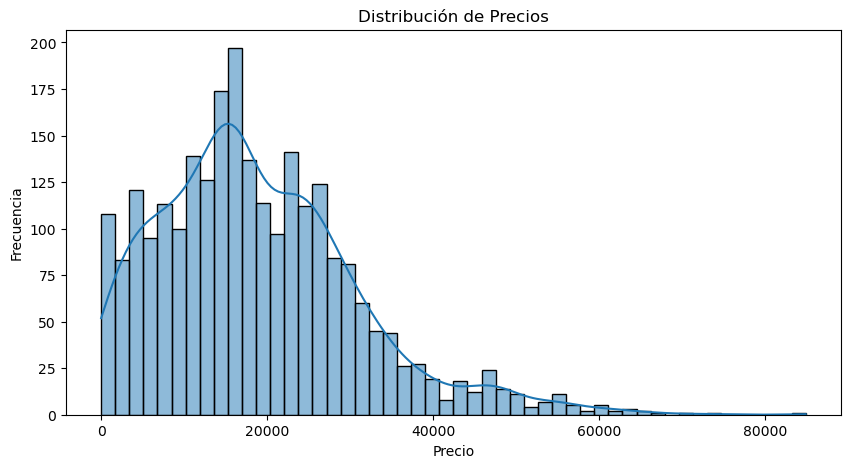

In [51]:
# GRAFICAMOS HISTOGRAMA DE FRECUENCIA DE PRECIOS
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='price', bins=50, kde=True)
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Distribución de Precios')
plt.show

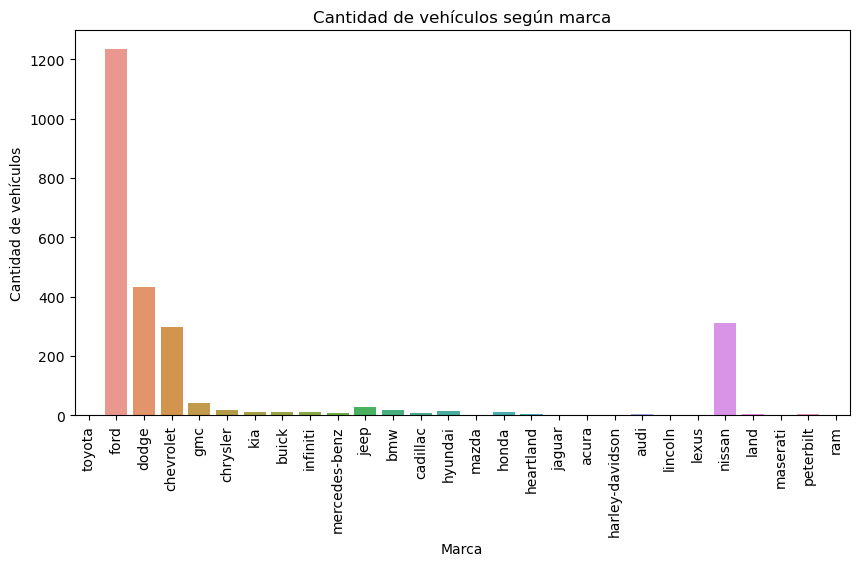

In [52]:
# GRAFICAMOS LA CANTIDAD DE VEHÍCULOS SEGÚN LA MARCA
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='brand')
plt.xlabel('Marca')
plt.xticks(rotation=90)
plt.ylabel('Cantidad de vehículos')
plt.title('Cantidad de vehículos según marca')
plt.show()

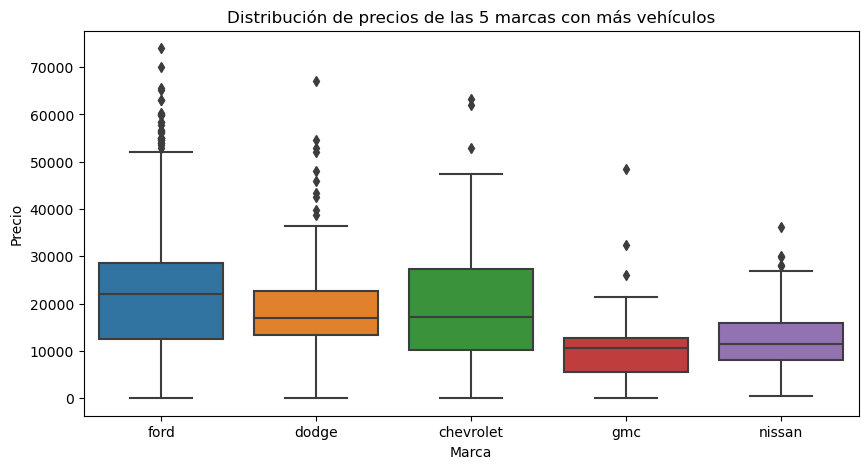

In [53]:
# GRAFICAMOS LA DISTRIBUCIÓN DE PRECIOS DE LAS 5 MARCAS CON MÁS VEHÍCULOS
top_brands = df['brand'].value_counts().nlargest(5).index
plt.figure(figsize=(10,5))
sns.boxplot(data=df[df['brand'].isin(top_brands)], x='brand', y='price')
plt.xlabel('Marca')
plt.ylabel('Precio')
plt.title('Distribución de precios de las 5 marcas con más vehículos')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

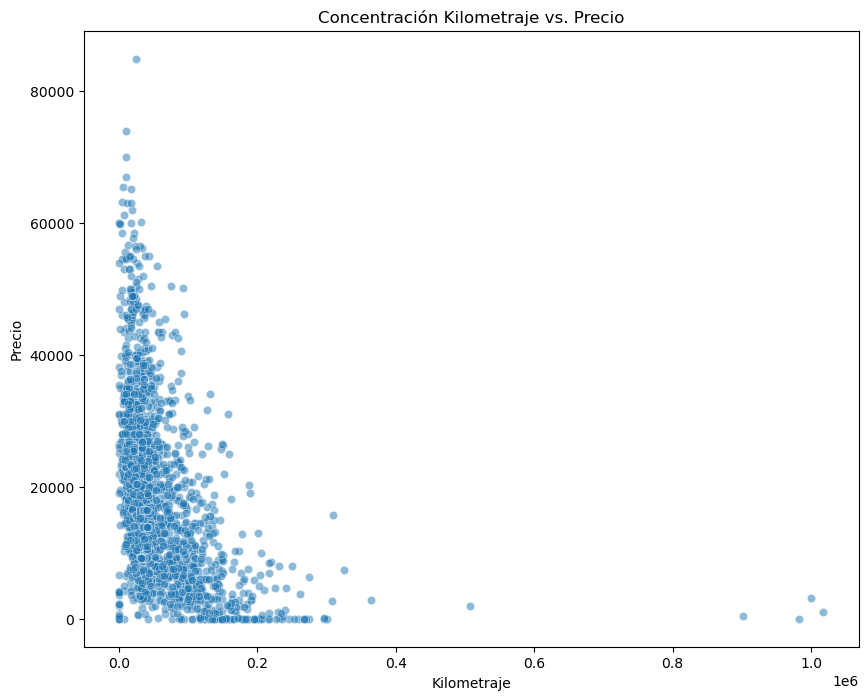

In [54]:
# GRAFICAMOS LA CONCENTRACIÓN DE KILOMETRAJE VS. PRECIO
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='mileage', y='price', alpha=0.5)
plt.xlabel('Kilometraje')
plt.ylabel('Precio')
plt.title('Concentración Kilometraje vs. Precio')
plt.show

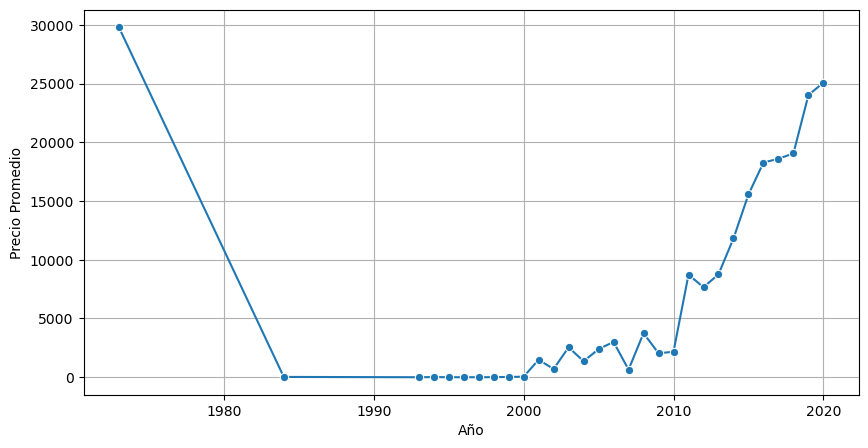

In [55]:
# GRAFICAMOS EL PRECIO PROMEDIO A LO LARGO DE LOS AÑOS
price_by_year = df.groupby('year')['price'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=price_by_year, x='year', y='price', marker='o')
plt.xlabel('Año')
plt.ylabel('Precio Promedio')
plt.grid(True)
plt.show()

---
## PARTE 2 - PREPROCESAMIENTO DE DATOS Y REDUCCIÓN DE DIMENSIONALIDAD
---

In [56]:
# ELIMINAMOS COLUMNAS IRRELEVANTES
df = df.drop(columns=['Unnamed: 0', 'title_status', 'color', 'vin', 'lot', 'country', 'condition'])
df.head()

,price,brand,model,year,mileage,state
0,6300,toyota,cruiser,2008,274117.0,new jersey
1,2899,ford,se,2011,190552.0,tennessee
2,5350,dodge,mpv,2018,39590.0,georgia
3,25000,ford,door,2014,64146.0,virginia
4,27700,chevrolet,1500,2018,6654.0,florida


In [57]:
# IDENTIFICAMOS VARIABLES CATEGÓRICAS QUE REQUIEREN CODIFICACIÓN
cat_cols = ['brand', 'model', 'state']
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])
    
df.head()

,price,brand,model,year,mileage,state
0,6300,27,25,2008,274117.0,24
1,2899,8,92,2011,190552.0,35
2,5350,7,75,2018,39590.0,7
3,25000,8,32,2014,64146.0,39
4,27700,5,0,2018,6654.0,6


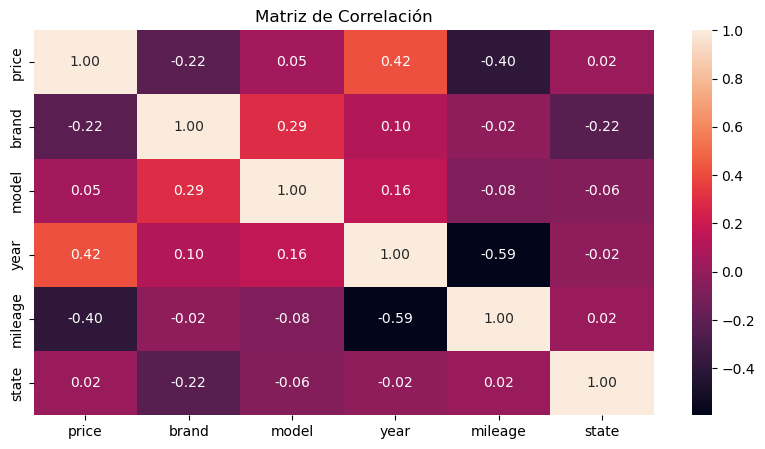

In [58]:
# CALCULAMOS MATRIZ DE CORRELACIÓN
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

In [65]:
# SEPARAMOS LAS VARIABLE OBJETIVO DE LAS DEMÁS
x = df.drop(columns=['price'])
y = df['price']

In [66]:
# ESCALAMOS LOS DATOS
ss = StandardScaler()
x_scaled = ss.fit_transform(x)

---
## PARTE 3 - ENTRENAMIENTO Y EVALUACIÓN DE MODELOS
---

In [71]:
# SEPARAMOS LAS VARIABLES EN ENTRENAMIENTO Y TESTETO
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [74]:
# CREAMOS FUNCIÓN PARA EVALUAR MODELOS DE REGRESIÓN
def evaluate_model(model, x_test, y_test, model_name='Modelo'):
    """
    Evalúa un modelo de regresión y muestra métricas clave.

    Argumentos:
        model: El modelo de regresión entrenado.
        x_test: El conjunto de datos de testeo.
        y_test: Las etiquetas reales del conjunto de testeo.
        model_name: Nombre descriptivo para el modelo, usado para los outputs
    """

    y_pred = model.predict(x_test)

    results = {
        'MSE': mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R2 Score': r2_score(y_test, y_pred)
    }

    print(f'\n--- Evaluación de {model_name} ---')
    for metric, value in results.items():
        print(f'{metric}: {value:.4f}')

    plt.figure(figsize=(10,5))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
    plt.xlabel("Valor Real")
    plt.ylabel("Predicción")
    plt.title(f"{model_name} - Real vs. Predcción")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


--- Evaluación de Linear Regression ---
MSE: 111986607.9327
MAE: 7850.0376
R2 Score: 0.2934


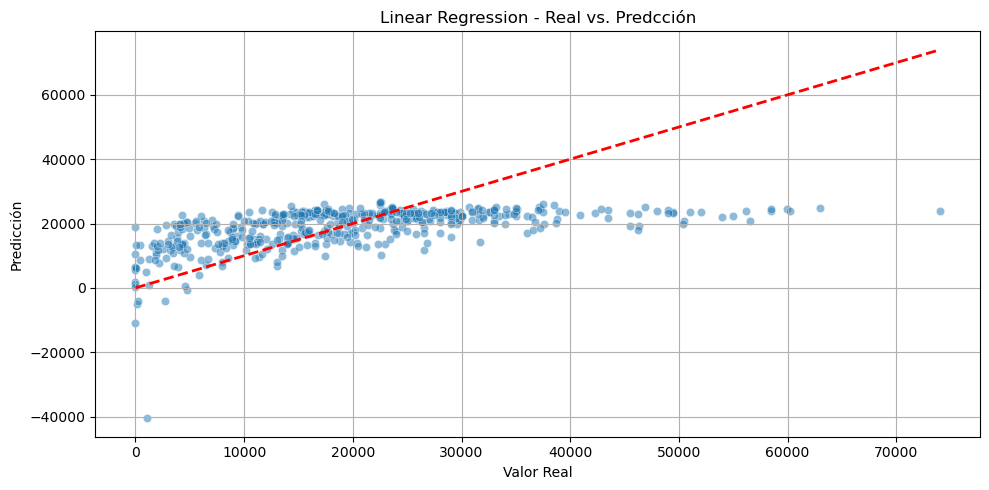

In [82]:
# IMPLEMENTAMOS MODELO LINEAR REGRESSION Y EVALUAMOS
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

lr_results = evaluate_model(lr_model, x_test, y_test, 'Linear Regression')


--- Evaluación de Random Forest Regressor ---
MSE: 49937531.5884
MAE: 4552.4240
R2 Score: 0.6849


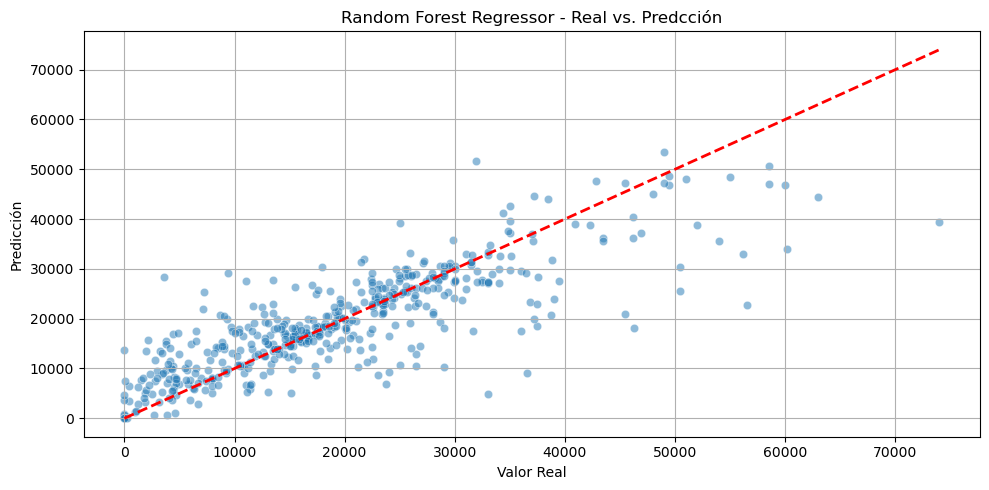

In [ ]:
# ENTRENAMOS MODELO RANDOM FOREST REGRESSOR
rfr_model = RandomForestRegressor(random_state=42)
rfr_model.fit(x_train, y_train)

rfr_results = evaluate_model(rfr_model, x_test, y_test, 'Random Forest Regressor')


--- Evaluación de KNN Regressor ---
MSE: 66550004.2482
MAE: 5508.6904
R2 Score: 0.5801


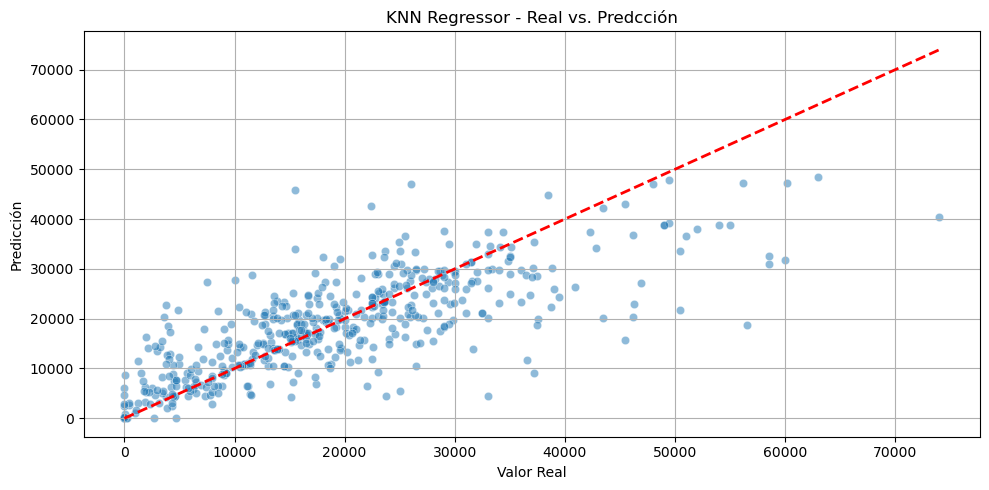

In [83]:
# ENTRENAMOS MODELO KNN REGRESSOR
knnr_model = KNeighborsRegressor(n_neighbors=5)
knnr_model.fit(x_train, y_train)

knnr_results = evaluate_model(knnr_model, x_test, y_test, 'KNN Regressor')

In [ ]:
scores = cross_val_score(LinearRegression(), X_scaled, y, scoring='r2', cv=5)
print("R² promedio (CV):", scores.mean().round(2))

R² promedio (CV): 0.17


In [ ]:
# 9. Validación cruzada
scores = cross_val_score(LinearRegression(), X_pca, y, scoring='r2', cv=5)
print("R² promedio (CV):", scores.mean().round(2))

R² promedio (CV): 0.17


RANDON FOREST REGRESIÓN 

RANDOM FOREST REGRESIÓN CON PCA

In [ ]:

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo
modelo_rf = RandomForestRegressor(random_state=42)
modelo_rf.fit(X_train, y_train)

# Predicciones
y_pred_rf = modelo_rf.predict(X_test)

# Evaluación
def evaluar_modelo(nombre, y_real, y_pred):
    mse = mean_squared_error(y_real, y_pred)
    mae = mean_absolute_error(y_real, y_pred)
    mape = mean_absolute_percentage_error(y_real, y_pred)
    r2 = r2_score(y_real, y_pred)

    print(f"\n{nombre}")
    print(f"Mean Squared Error (MSE):     {mse:,.2f}")
    print(f"Mean Absolute Error (MAE):    {mae:,.2f}")
    print(f"Mean Absolute Percentage Error: {mape:.4f}")
    print(f"R² Score:                     {r2:.4f}")

# Mostrar resultados
evaluar_modelo("Random Forest sin PCA", y_test, y_pred_rf)

# Validación cruzada (cross-validation)
scores_rf = cross_val_score(RandomForestRegressor(random_state=42), X_scaled, y, scoring='r2', cv=5)
print(f"R² promedio (CV): {scores_rf.mean()}")


Random Forest sin PCA
Mean Squared Error (MSE):     49,937,531.59
Mean Absolute Error (MAE):    4,552.42
Mean Absolute Percentage Error: 215365646988566496.0000
R² Score:                     0.6849
R² promedio (CV): 0.34782760652004685


RANDOM FOREST REGRESIÓN CON PCA

In [ ]:
# Entrenamiento del modelo
modelo_rf = RandomForestRegressor(random_state=42)
modelo_rf.fit(X_train, y_train)

# Predicción
y_pred_rf = modelo_rf.predict(X_test)

# Evaluación
def evaluar_modelo(nombre, y_real, y_pred):
    mse = mean_squared_error(y_real, y_pred)
    mae = mean_absolute_error(y_real, y_pred)
    mape = mean_absolute_percentage_error(y_real, y_pred)
    r2 = r2_score(y_real, y_pred)

    print(f"\n{nombre}")
    print(f"Mean Squared Error (MSE):     {mse:,.2f}")
    print(f"Mean Absolute Error (MAE):    {mae:,.2f}")
    print(f"Mean Absolute Percentage Error: {mape:.4f}")
    print(f"R² Score:                     {r2:.4f}")

# Mostrar métricas
evaluar_modelo("Random Forest con PCA", y_test, y_pred_rf)

# Cross-validation
scores_rf = cross_val_score(RandomForestRegressor(random_state=42), X_pca, y, scoring='r2', cv=5)
print(f"R² promedio (CV): {scores_rf.mean()}")


Random Forest con PCA
Mean Squared Error (MSE):     49,937,531.59
Mean Absolute Error (MAE):    4,552.42
Mean Absolute Percentage Error: 215365646988566496.0000
R² Score:                     0.6849
R² promedio (CV): -0.07885461696283373


 KNN Regressor

 KNN Regressor SIN PCA

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, cross_val_score

# Supone que ya tienes:
# X_scaled: variables numéricas escaladas (sin PCA)
# y: variable objetivo (price)

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear modelo KNN
modelo_knn = KNeighborsRegressor(n_neighbors=5)
modelo_knn.fit(X_train, y_train)

# Predicciones
y_pred_knn = modelo_knn.predict(X_test)

# Evaluación
def evaluar_modelo(nombre, y_real, y_pred):
    mse = mean_squared_error(y_real, y_pred)
    mae = mean_absolute_error(y_real, y_pred)
    mape = mean_absolute_percentage_error(y_real, y_pred)
    r2 = r2_score(y_real, y_pred)

    print(f"\n{nombre}")
    print(f"Mean Squared Error (MSE):     {mse:,.2f}")
    print(f"Mean Absolute Error (MAE):    {mae:,.2f}")
    print(f"Mean Absolute Percentage Error: {mape:.4f}")
    print(f"R² Score:                     {r2:.4f}")

# Mostrar métricas
evaluar_modelo("KNN Regressor sin PCA", y_test, y_pred_knn)

# Validación cruzada
scores_knn = cross_val_score(KNeighborsRegressor(n_neighbors=5), X_scaled, y, scoring='r2', cv=5)
print(f"R² promedio (CV): {scores_knn.mean()}")



KNN Regressor sin PCA
Mean Squared Error (MSE):     66,550,004.25
Mean Absolute Error (MAE):    5,508.69
Mean Absolute Percentage Error: 148454856676790080.0000
R² Score:                     0.5801
R² promedio (CV): -0.15173794191965545


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# 1. Escalamiento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X: dataframe sin la columna 'price'
y = df['price']                     # y: columna objetivo

# 2. Reducción de dimensionalidad con PCA
pca = PCA(n_components=0.95)  # mantener 95% de la varianza
X_pca = pca.fit_transform(X_scaled)

# 3. División de datos
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# 4. Entrenamiento del modelo
modelo_knn = KNeighborsRegressor(n_neighbors=5)
modelo_knn.fit(X_train, y_train)

# 5. Predicción
y_pred_knn = modelo_knn.predict(X_test)

# 6. Evaluación
def evaluar_modelo(nombre, y_real, y_pred):
    mse = mean_squared_error(y_real, y_pred)
    mae = mean_absolute_error(y_real, y_pred)
    mape = mean_absolute_percentage_error(y_real, y_pred)
    r2 = r2_score(y_real, y_pred)

    print(f"\n{nombre}")
    print(f"Mean Squared Error (MSE):     {mse:,.2f}")
    print(f"Mean Absolute Error (MAE):    {mae:,.2f}")
    print(f"Mean Absolute Percentage Error: {mape:.4f}")
    print(f"R² Score:                     {r2:.4f}")

# Mostrar métricas
evaluar_modelo("KNN Regressor con PCA", y_test, y_pred_knn)

# 7. Validación cruzada
scores_knn_pca = cross_val_score(KNeighborsRegressor(n_neighbors=5), X_pca, y, scoring='r2', cv=5)
print(f"R² promedio (CV): {scores_knn_pca.mean()}")



KNN Regressor con PCA
Mean Squared Error (MSE):     66,550,004.25
Mean Absolute Error (MAE):    5,508.69
Mean Absolute Percentage Error: 148454856676790080.0000
R² Score:                     0.5801
R² promedio (CV): -0.15173794191965545


---
## PARTE 4 - COMPARACIÓN FINAL DE MODELOS Y CONCLUSIÓN
---